In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from sklearn.preprocessing import MinMaxScaler

# Define file paths (Downloads folder)
downloads_dir = Path.home() / "Downloads"  # This works on both Windows and macOS/Linux

building_path = downloads_dir / "sp25_allbuildings_kw.csv"
pv_path = downloads_dir / "sp25_pvdata.csv"

# Load CSV files
building_kw = pd.read_csv(building_path)
pv_kw = pd.read_csv(pv_path)

# Convert 'datetime' column to datetime format
building_kw['datetime'] = pd.to_datetime(building_kw['datetime'])
pv_kw['datetime'] = pd.to_datetime(pv_kw['datetime'])

# Set datetime as index and sort
building_kw.set_index('datetime', inplace=True)
pv_kw.set_index('datetime', inplace=True)

building_kw.sort_index(inplace=True)
pv_kw.sort_index(inplace=True)

# Verify the first few rows
print(building_kw.head())
print(pv_kw.head())


                              meter_name        mean
datetime                                            
2023-07-01       biomedical_science_ch_2  242.510189
2023-07-01             ag_science_main_1  163.634504
2023-07-01                wist_hall_main   12.212989
2023-07-01              george_hall_main   18.559917
2023-07-01  les_murakami_stadium_consess    2.866667
                     sensor_id  power_avg_kw  sensor_id-2  dg_size_kw_stc  \
datetime                                                                    
2023-07-01 00:00:00          7        -0.090            7          973.33   
2023-07-01 00:00:00          5        -0.771            5           45.00   
2023-07-01 00:00:00         11         0.000           11           33.00   
2023-07-01 00:00:00          1         0.000            1           11.02   
2023-07-01 00:15:00          1         0.000            1           11.02   

                                                 building_complex_name  
datetime        

In [4]:
music_main = building_kw[building_kw.meter_name == 'music_complex_main']
music_main = music_main.sort_index(ascending=True)
music_main.head(70)

,meter_name,mean
datetime,,
2023-07-01 00:00:00,music_complex_main,22.547778
2023-07-01 00:15:00,music_complex_main,22.321111
2023-07-01 00:30:00,music_complex_main,22.592222
2023-07-01 00:45:00,music_complex_main,22.233333
2023-07-01 01:00:00,music_complex_main,22.034444
...,...,...
2023-07-01 16:15:00,music_complex_main,59.762222
2023-07-01 16:30:00,music_complex_main,60.215556
2023-07-01 16:45:00,music_complex_main,60.191111


In [5]:
webster_hall_main = building_kw[building_kw.meter_name == 'webster_hall_main']
webster_hall_main = webster_hall_main.sort_index(ascending=True)
webster_hall_main = webster_hall_main.rename(columns={'mean': 'kW'})
webster_hall_main.head()

,meter_name,kW
datetime,,
2023-07-01 00:00:00,webster_hall_main,30.468689
2023-07-01 00:15:00,webster_hall_main,29.929433
2023-07-01 00:30:00,webster_hall_main,29.405122
2023-07-01 00:45:00,webster_hall_main,29.749778
2023-07-01 01:00:00,webster_hall_main,30.963711


In [6]:
music_main.index = pd.to_datetime(music_main.index)

# Resample to daily frequency and find the maximum kW for each day
daily_peak_kw = music_main.resample('D').max()

# Reset index to have 'date' as a column
daily_peak_kw.reset_index(inplace=True)
print(daily_peak_kw[['datetime', 'mean']])

      datetime        mean
0   2023-07-01   96.010000
1   2023-07-02   94.333333
2   2023-07-03  103.217778
3   2023-07-04  102.442222
4   2023-07-05  150.161111
..         ...         ...
361 2024-06-26  126.000000
362 2024-06-27  120.000000
363 2024-06-28  125.000000
364 2024-06-29  118.000000
365 2024-06-30  118.000000

[366 rows x 2 columns]


In [7]:
webster_hall_main['kWh'] = webster_hall_main['kW'] * (15 / 60)  # Multiply by 0.25
webster_hall_main.head()

,meter_name,kW,kWh
datetime,,,
2023-07-01 00:00:00,webster_hall_main,30.468689,7.617172
2023-07-01 00:15:00,webster_hall_main,29.929433,7.482358
2023-07-01 00:30:00,webster_hall_main,29.405122,7.351281
2023-07-01 00:45:00,webster_hall_main,29.749778,7.437444
2023-07-01 01:00:00,webster_hall_main,30.963711,7.740928


In [8]:
# plt.figure(figsize=(12, 6))
# plt.scatter(daily_peak_kw['datetime'], daily_peak_kw['mean'], color='blue', marker='o')

# plt.title('Daily Peak kW Values for Music Complex Main', fontsize=16)
# plt.xlabel('Date', fontsize=14)
# plt.ylabel('Peak kW', fontsize=14)
# plt.xticks(rotation=45) 
# plt.grid()
# plt.tight_layout()
# plt.show()

In [9]:
music_main['kWh'] = music_main['mean'] * (15 / 60)  # Multiply by 0.25
music_main.head()

,meter_name,mean,kWh
datetime,,,
2023-07-01 00:00:00,music_complex_main,22.547778,5.636944
2023-07-01 00:15:00,music_complex_main,22.321111,5.580278
2023-07-01 00:30:00,music_complex_main,22.592222,5.648056
2023-07-01 00:45:00,music_complex_main,22.233333,5.558333
2023-07-01 01:00:00,music_complex_main,22.034444,5.508611


In [10]:
daily_sum_kwh = music_main.resample('D')['kWh'].sum()

# Reset index to have 'date' as a column
daily_sum_kwh = daily_sum_kwh.reset_index()

In [11]:
# plt.figure(figsize=(10, 5))
# plt.scatter(daily_sum_kwh['datetime'], daily_sum_kwh['kWh'], color='orange', marker='o')
# plt.title('Daily Sum of kWh')
# plt.xlabel('Date')
# plt.ylabel('kWh')
# plt.xticks(rotation=45)
# plt.grid()
# plt.tight_layout()
# plt.show()

In [12]:
parking_kw = pv_kw[pv_kw.building_complex_name == 'LOWER CAMPUS PARKING STRUCTURE - PHASE II']
parking_kw = parking_kw.sort_index(ascending=True)
parking_kw.head()

parking_kw_kw = parking_kw[['power_avg_kw']]

print(parking_kw_kw.head(70))


                     power_avg_kw
datetime                         
2023-07-01 00:00:00        -0.090
2023-07-01 00:15:00        -0.091
2023-07-01 00:30:00        -0.090
2023-07-01 00:45:00        -0.092
2023-07-01 01:00:00        -0.091
...                           ...
2023-07-01 16:15:00       469.717
2023-07-01 16:30:00       421.272
2023-07-01 16:45:00       355.624
2023-07-01 17:00:00       271.378
2023-07-01 17:15:00       248.126

[70 rows x 1 columns]


In [13]:
parking_numerical_cols = parking_kw_kw.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler(feature_range=(0, 268))  
parking_kw_kw[parking_numerical_cols] = scaler.fit_transform(parking_kw_kw[parking_numerical_cols])
parking_kw_kw.head()

/var/folders/0_/cdcklxnx7gn78b5hflm8vz6c0000gn/T/ipykernel_3643/4074501763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parking_kw_kw[parking_numerical_cols] = scaler.fit_transform(parking_kw_kw[parking_numerical_cols])


,power_avg_kw
datetime,
2023-07-01 00:00:00,0.004148
2023-07-01 00:15:00,0.003852
2023-07-01 00:30:00,0.004148
2023-07-01 00:45:00,0.003556
2023-07-01 01:00:00,0.003852


In [14]:
# Initialize a new MinMaxScaler with a range of 0 to 500
scaler_webster = MinMaxScaler(feature_range=(0, 142))

# Select numerical columns from the parking_kw_kw DataFrame (those with float64 or int64 types)
parking_numerical_cols = parking_kw_kw.select_dtypes(include=['float64', 'int64']).columns

# Create a new DataFrame 'parking_webster' by applying the scaler to the selected columns
parking_webster = parking_kw_kw.copy()
parking_webster[parking_numerical_cols] = scaler_webster.fit_transform(parking_webster[parking_numerical_cols])
parking_webster['kWh'] = parking_webster['power_avg_kw'] * 0.25


# Display the first few rows of the new DataFrame 'parking_webster'
print(parking_webster.head())

                     power_avg_kw       kWh
datetime                                   
2023-07-01 00:00:00      0.002198  0.000549
2023-07-01 00:15:00      0.002041  0.000510
2023-07-01 00:30:00      0.002198  0.000549
2023-07-01 00:45:00      0.001884  0.000471
2023-07-01 01:00:00      0.002041  0.000510


In [15]:
# Convert the index to DatetimeIndex if it's not already
parking_kw_kw.index = pd.to_datetime(parking_kw_kw.index)
webster_hall_main.index = pd.to_datetime(webster_hall_main.index)
parking_webster.index = pd.to_datetime(parking_webster.index)
# Verify the result
parking_webster.head()


,power_avg_kw,kWh
datetime,,
2023-07-01 00:00:00,0.002198,0.000549
2023-07-01 00:15:00,0.002041,0.000510
2023-07-01 00:30:00,0.002198,0.000549
2023-07-01 00:45:00,0.001884,0.000471
2023-07-01 01:00:00,0.002041,0.000510


In [16]:
print(type(parking_kw_kw.index))
print(type(music_main.index))
print(type(webster_hall_main.index))
print(type(parking_webster.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [17]:
parking_webster

,power_avg_kw,kWh
datetime,,
2023-07-01 00:00:00,0.002198,0.000549
2023-07-01 00:15:00,0.002041,0.000510
2023-07-01 00:30:00,0.002198,0.000549
2023-07-01 00:45:00,0.001884,0.000471
2023-07-01 01:00:00,0.002041,0.000510
...,...,...
2024-06-30 22:45:00,0.002041,0.000510
2024-06-30 23:00:00,0.002355,0.000589
2024-06-30 23:15:00,0.001884,0.000471


In [18]:

# Resample parking_kw_kw to daily max of 'power_avg_kw'
daily_parking_kw = parking_kw_kw.resample('D')['power_avg_kw'].max()
daily_parking_webster = parking_webster.resample('D')['power_avg_kw'].max()
# Resample music_main to daily max of 'mean'
daily_music_main = music_main.resample('D')['mean'].max()

daily_webster_main = webster_hall_main.resample('D')['kW'].max()
# Print to verify the results
print(daily_parking_kw.head())
print(daily_parking_webster.head())
print(daily_music_main.head())
print(daily_webster_main.head())


datetime
2023-07-01    240.084457
2023-07-02    231.260382
2023-07-03    220.076505
2023-07-04    235.719236
2023-07-05    231.978931
Freq: D, Name: power_avg_kw, dtype: float64
datetime
2023-07-01    127.208929
2023-07-02    122.533486
2023-07-03    116.607700
2023-07-04    124.896013
2023-07-05    122.914210
Freq: D, Name: power_avg_kw, dtype: float64
datetime
2023-07-01     96.010000
2023-07-02     94.333333
2023-07-03    103.217778
2023-07-04    102.442222
2023-07-05    150.161111
Freq: D, Name: mean, dtype: float64
datetime
2023-07-01    49.261711
2023-07-02    46.566822
2023-07-03    70.018556
2023-07-04    53.113311
2023-07-05    66.788289
Freq: D, Name: kW, dtype: float64


In [19]:
# Merge both datasets on 'datetime' index
merged_data_kw = pd.merge(
    daily_music_main, daily_parking_kw, 
    left_index=True, right_index=True, 
    suffixes=('_load', '_pv')
)

# Calculate the difference
merged_data_kw['difference'] = merged_data_kw['mean'] - merged_data_kw['power_avg_kw']

# Print the merged DataFrame
print(merged_data_kw.head())


                  mean  power_avg_kw  difference
datetime                                        
2023-07-01   96.010000    240.084457 -144.074457
2023-07-02   94.333333    231.260382 -136.927049
2023-07-03  103.217778    220.076505 -116.858727
2023-07-04  102.442222    235.719236 -133.277014
2023-07-05  150.161111    231.978931  -81.817820


In [20]:
# Merge both datasets on 'datetime' index
webster_merged_data_kw = pd.merge(
    daily_webster_main, daily_parking_webster, 
    left_index=True, right_index=True, 
    suffixes=('_load', '_pv')
)

# Calculate the difference
webster_merged_data_kw['difference'] = webster_merged_data_kw['kW'] - webster_merged_data_kw['power_avg_kw']

# Print the merged DataFrame
print(webster_merged_data_kw.head())

                   kW  power_avg_kw  difference
datetime                                       
2023-07-01  49.261711    127.208929  -77.947218
2023-07-02  46.566822    122.533486  -75.966664
2023-07-03  70.018556    116.607700  -46.589145
2023-07-04  53.113311    124.896013  -71.782702
2023-07-05  66.788289    122.914210  -56.125921


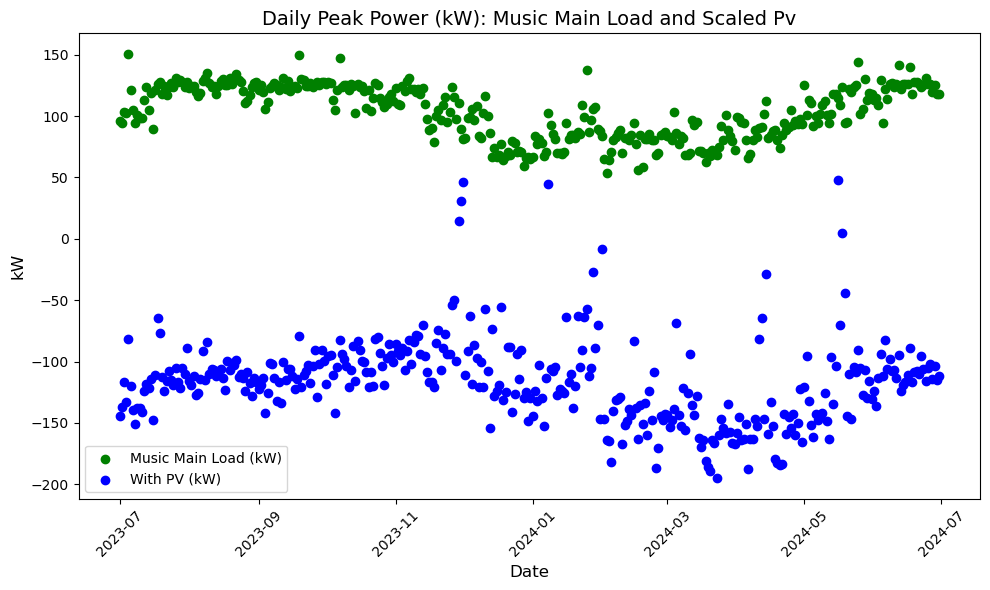

In [21]:
plt.figure(figsize=(10, 6))

# Plot mean (load in kW)
plt.scatter(merged_data_kw.index, merged_data_kw['mean'], color='g', label='Music Main Load (kW)')

# Plot difference (load - PV in kW)
plt.scatter(merged_data_kw.index, merged_data_kw['difference'], color='b', label='With PV (kW)')

# Add title and labels
plt.title('Daily Peak Power (kW): Music Main Load and Scaled Pv', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('kW', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



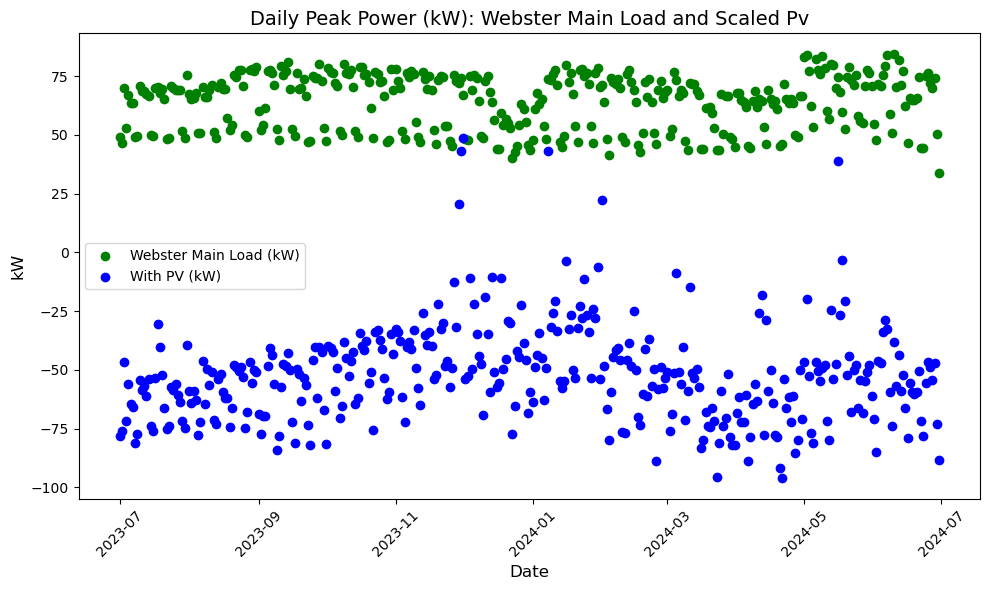

In [22]:
plt.figure(figsize=(10, 6))

# Plot mean (load in kW)
plt.scatter(webster_merged_data_kw.index, webster_merged_data_kw['kW'], color='g', label='Webster Main Load (kW)')

# Plot difference (load - PV in kW)
plt.scatter(webster_merged_data_kw.index, webster_merged_data_kw['difference'], color='b', label='With PV (kW)')

# Add title and labels
plt.title('Daily Peak Power (kW): Webster Main Load and Scaled Pv', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('kW', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [23]:
merged_data_kw

,mean,power_avg_kw,difference
datetime,,,
2023-07-01,96.010000,240.084457,-144.074457
2023-07-02,94.333333,231.260382,-136.927049
2023-07-03,103.217778,220.076505,-116.858727
2023-07-04,102.442222,235.719236,-133.277014
2023-07-05,150.161111,231.978931,-81.817820
...,...,...,...
2024-06-26,126.000000,228.236255,-102.236255
2024-06-27,120.000000,234.442146,-114.442146
2024-06-28,125.000000,228.644865,-103.644865


In [24]:

# Resample both datasets to daily sum of kWh
# For music_main, multiply 'mean' by 0.25 to get kWh and resample (sum)
music_main['kWh'] = music_main['mean'] * (15 / 60)  # Assuming 15-minute intervals
daily_music_main_kWh_sum = music_main.resample('D')['kWh'].sum()  # daily sum for kWh of music_main

parking_kw_kw['power_avg_kwh'] = parking_kw_kw['power_avg_kw'] * (15 / 60)  # Assuming 15-minute intervals
daily_parking_kw_kWh_sum = parking_kw_kw.resample('D')['power_avg_kwh'].sum()

# Merge both datasets on 'datetime'
merged_data_kWh_sum = pd.merge(daily_music_main_kWh_sum, daily_parking_kw_kWh_sum, left_index=True, right_index=True, suffixes=('_load', '_pv'))

# Calculate the difference: 
merged_data_kWh_sum['difference_kWh'] = merged_data_kWh_sum['kWh'] - merged_data_kWh_sum['power_avg_kwh']



/var/folders/0_/cdcklxnx7gn78b5hflm8vz6c0000gn/T/ipykernel_3643/3769528729.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parking_kw_kw['power_avg_kwh'] = parking_kw_kw['power_avg_kw'] * (15 / 60)  # Assuming 15-minute intervals


In [25]:
webster_hall_main

,meter_name,kW,kWh
datetime,,,
2023-07-01 00:00:00,webster_hall_main,30.468689,7.617172
2023-07-01 00:15:00,webster_hall_main,29.929433,7.482358
2023-07-01 00:30:00,webster_hall_main,29.405122,7.351281
2023-07-01 00:45:00,webster_hall_main,29.749778,7.437444
2023-07-01 01:00:00,webster_hall_main,30.963711,7.740928
...,...,...,...
2024-06-30 22:45:00,webster_hall_main,26.490000,6.622500
2024-06-30 23:00:00,webster_hall_main,29.250000,7.312500
2024-06-30 23:15:00,webster_hall_main,23.190000,5.797500


In [26]:
parking_webster.head()

,power_avg_kw,kWh
datetime,,
2023-07-01 00:00:00,0.002198,0.000549
2023-07-01 00:15:00,0.002041,0.000510
2023-07-01 00:30:00,0.002198,0.000549
2023-07-01 00:45:00,0.001884,0.000471
2023-07-01 01:00:00,0.002041,0.000510


In [27]:
webster_hall_main['kWh'] = webster_hall_main['kW'] * (15 / 60)
daily_webster_kWh_sum = webster_hall_main.resample('D')['kWh'].sum()  # daily sum for kWh of music_main

parking_webster['power_avg_kwh'] = parking_webster['power_avg_kw'] * (15 / 60)  # Assuming 15-minute intervals
daily_parking_webster_kw_kWh_sum = parking_webster.resample('D')['power_avg_kwh'].sum()

# Merge both datasets on 'datetime'
merged_webster_data_kWh_sum = pd.merge(daily_webster_kWh_sum, daily_parking_webster_kw_kWh_sum, left_index=True, right_index=True, suffixes=('_load', '_pv'))

# Calculate the difference: 
merged_webster_data_kWh_sum['difference_kWh'] = merged_webster_data_kWh_sum['kWh'] - merged_webster_data_kWh_sum['power_avg_kwh']


In [28]:
merged_webster_data_kWh_sum.head()

,kWh,power_avg_kwh,difference_kWh
datetime,,,
2023-07-01,825.468636,762.151240,63.317396
2023-07-02,775.954878,954.322834,-178.367957
2023-07-03,1162.509881,783.120513,379.389368
2023-07-04,918.584997,881.191136,37.393861
2023-07-05,1125.280686,704.541013,420.739673


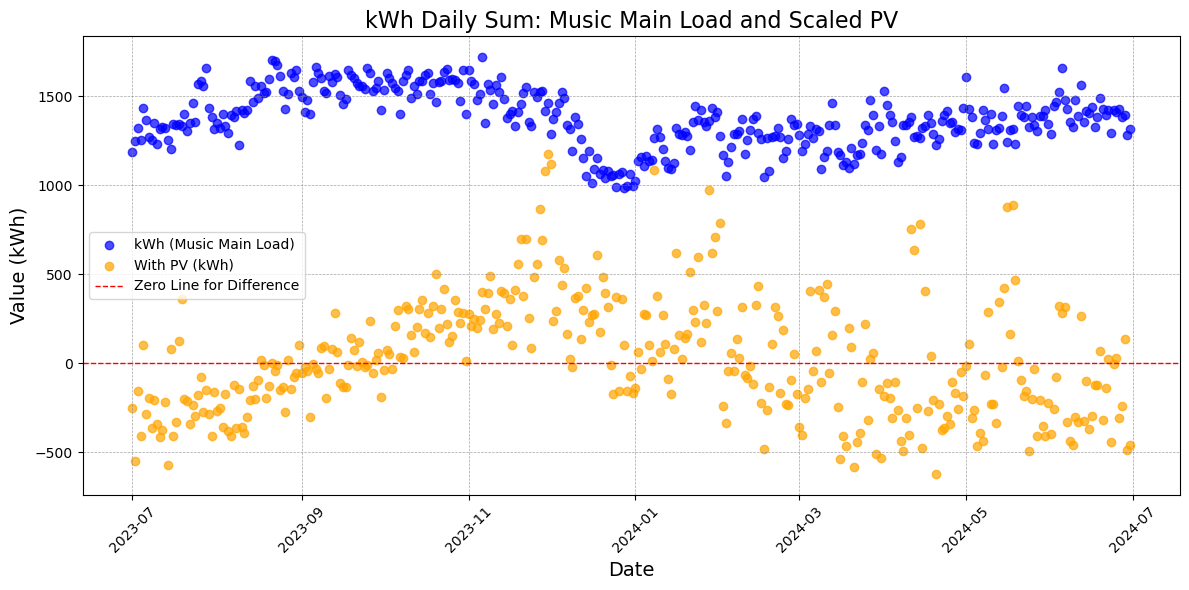

In [29]:
plt.figure(figsize=(12, 6))

# Scatter plot for kWh
plt.scatter(merged_data_kWh_sum.index, merged_data_kWh_sum['kWh'], color='blue', alpha=0.7, label='kWh (Music Main Load)')

# Scatter plot for difference_kWh
plt.scatter(merged_data_kWh_sum.index, merged_data_kWh_sum['difference_kWh'], color='orange', alpha=0.7, label='With PV (kWh)')

# Add grid for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add a horizontal reference line at 0 for difference
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Zero Line for Difference')

# Set the title and axis labels
plt.title('kWh Daily Sum: Music Main Load and Scaled PV', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value (kWh)', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add legend to differentiate between the two datasets
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


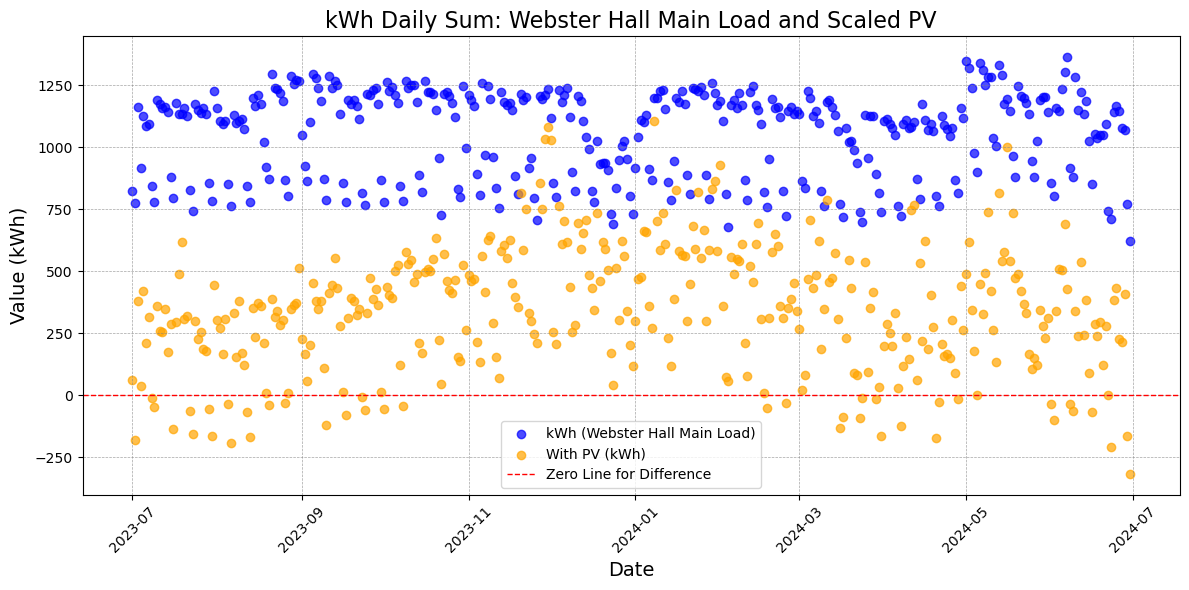

In [30]:
plt.figure(figsize=(12, 6))

# Scatter plot for kWh
plt.scatter(merged_webster_data_kWh_sum.index, merged_webster_data_kWh_sum['kWh'], color='blue', alpha=0.7, label='kWh (Webster Hall Main Load)')

# Scatter plot for difference_kWh
plt.scatter(merged_webster_data_kWh_sum.index, merged_webster_data_kWh_sum['difference_kWh'], color='orange', alpha=0.7, label='With PV (kWh)')

# Add grid for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add a horizontal reference line at 0 for difference
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Zero Line for Difference')

# Set the title and axis labels
plt.title('kWh Daily Sum: Webster Hall Main Load and Scaled PV', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value (kWh)', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add legend to differentiate between the two datasets
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [31]:
merged_data_kWh_sum

,kWh,power_avg_kwh,difference_kWh
datetime,,,
2023-07-01,1184.135833,1438.426283,-254.290450
2023-07-02,1249.648889,1801.116335,-551.467447
2023-07-03,1323.831944,1478.002094,-154.170150
2023-07-04,1256.447778,1663.093129,-406.645352
2023-07-05,1433.344167,1329.697123,103.647044
...,...,...,...
2024-06-26,1426.750000,1736.516807,-309.766807
2024-06-27,1384.250000,1624.573585,-240.323585
2024-06-28,1391.750000,1253.498292,138.251708


In [32]:
merged_data_kw

,mean,power_avg_kw,difference
datetime,,,
2023-07-01,96.010000,240.084457,-144.074457
2023-07-02,94.333333,231.260382,-136.927049
2023-07-03,103.217778,220.076505,-116.858727
2023-07-04,102.442222,235.719236,-133.277014
2023-07-05,150.161111,231.978931,-81.817820
...,...,...,...
2024-06-26,126.000000,228.236255,-102.236255
2024-06-27,120.000000,234.442146,-114.442146
2024-06-28,125.000000,228.644865,-103.644865


In [33]:
# Ensure both dataframes have the datetime index
music_main_mean = music_main[['mean']]
parking_kw_kw_mean = parking_kw_kw[['power_avg_kw']]

# Merging the two dataframes on the datetime index (assuming both are already aligned by datetime)
combined_data = pd.merge(music_main_mean, parking_kw_kw_mean, left_index=True, right_index=True, how='inner')

# Creating a new column 'difference' that calculates the difference between 'mean' and 'power_avg_kw'
combined_data['difference'] = combined_data['mean'] - combined_data['power_avg_kw']

# Display the combined dataframe
print(combined_data.head())


                          mean  power_avg_kw  difference
datetime                                                
2023-07-01 00:00:00  22.547778      0.004148   22.543629
2023-07-01 00:15:00  22.321111      0.003852   22.317259
2023-07-01 00:30:00  22.592222      0.004148   22.588074
2023-07-01 00:45:00  22.233333      0.003556   22.229778
2023-07-01 01:00:00  22.034444      0.003852   22.030592


In [34]:
# Ensure both dataframes have the datetime index
webster_hall_main_mean = webster_hall_main[['kW']]
parking_webster_mean = parking_webster[['power_avg_kw']]

# Merging the two dataframes on the datetime index (assuming both are already aligned by datetime)
combined_data2 = pd.merge(webster_hall_main_mean, parking_webster_mean, left_index=True, right_index=True, how='inner')

# Creating a new column 'difference' that calculates the difference between 'mean' and 'power_avg_kw'
combined_data2['difference'] = combined_data2['kW'] - combined_data2['power_avg_kw']

# Display the combined dataframe
print(combined_data2.head())

                            kW  power_avg_kw  difference
datetime                                                
2023-07-01 00:00:00  30.468689      0.002198   30.466491
2023-07-01 00:15:00  29.929433      0.002041   29.927392
2023-07-01 00:30:00  29.405122      0.002198   29.402924
2023-07-01 00:45:00  29.749778      0.001884   29.747894
2023-07-01 01:00:00  30.963711      0.002041   30.961670


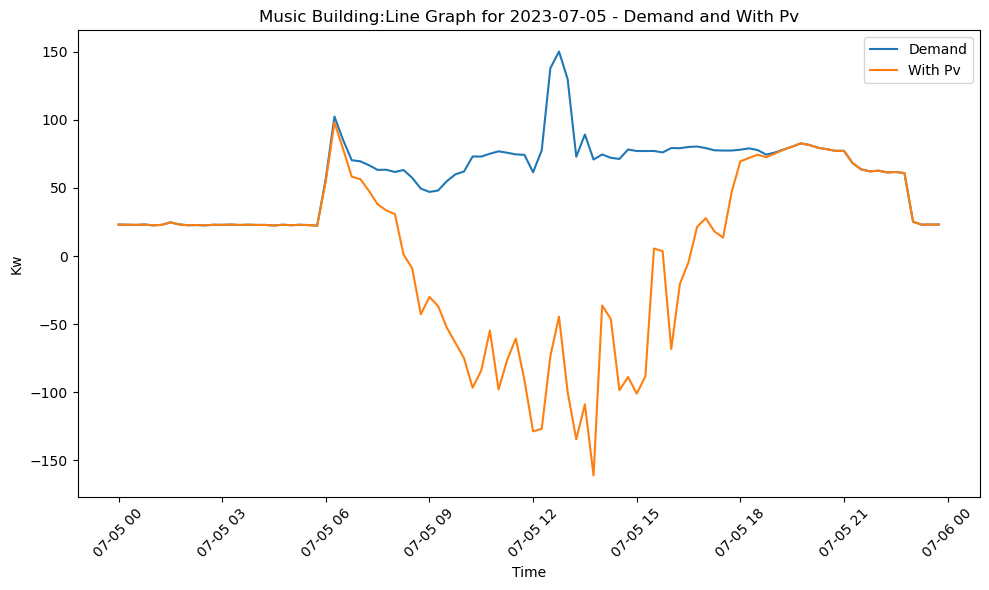

In [35]:


# Filter the data for the specific day (2023-07-05)
data_for_plot = combined_data.loc['2023-07-05']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot 'mean' and 'difference' columns
plt.plot(data_for_plot.index, data_for_plot['mean'], label='Demand')
plt.plot(data_for_plot.index, data_for_plot['difference'], label='With Pv')

# Title and labels
plt.title('Music Building:Line Graph for 2023-07-05 - Demand and With Pv')
plt.xlabel('Time')
plt.ylabel('Kw')

# Show legend
plt.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()


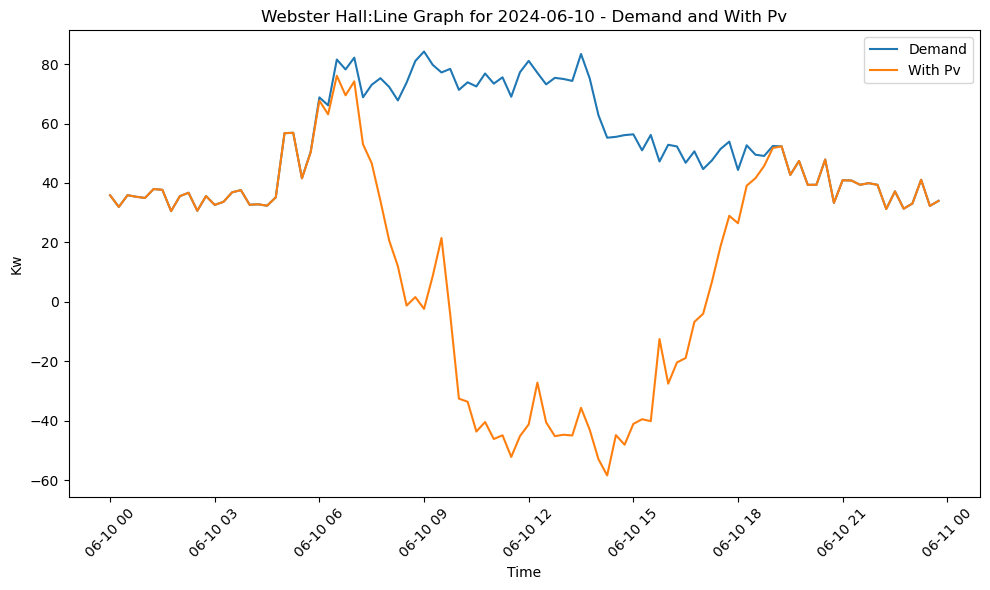

In [36]:


# Filter the data for the specific day (2024-06-10)
data_for_plot2 = combined_data2.loc['2024-06-10']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot 'mean' and 'difference' columns
plt.plot(data_for_plot2.index, data_for_plot2['kW'], label='Demand')
plt.plot(data_for_plot2.index, data_for_plot2['difference'], label='With Pv')

# Title and labels
plt.title('Webster Hall:Line Graph for 2024-06-10 - Demand and With Pv')
plt.xlabel('Time')
plt.ylabel('Kw')

# Show legend
plt.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()

In [37]:
# Assuming your dataframe is named `merged_data_kWh_sum`
max_kWh_day = merged_data_kWh_sum['kWh'].idxmax()  # Find the index of the max kWh value
max_kWh_value = merged_data_kWh_sum['kWh'].max()   # Find the maximum kWh value

# Print the results
print(f"Day with maximum kWh: {max_kWh_day} with {max_kWh_value} kWh")

Day with maximum kWh: 2023-11-06 00:00:00 with 1719.4408333333333 kWh


In [38]:
# Filter the data for 2023-11-06
music_main_day = music_main.loc['2023-11-06']
parking_kw_kw_day = parking_kw_kw.loc['2023-11-06']

# Combine both datasets into one DataFrame
combined_data = pd.DataFrame({
    'music_main_kWh': music_main_day['kWh'],
    'parking_kw_kw_kWh': parking_kw_kw_day['power_avg_kwh']
})

combined_data['difference'] = combined_data['music_main_kWh'] - combined_data['parking_kw_kw_kWh']
# Display the combined data
print(combined_data)


                     music_main_kWh  parking_kw_kw_kWh  difference
datetime                                                          
2023-11-06 00:00:00        6.367778           0.000815    6.366963
2023-11-06 00:15:00        6.373333           0.000963    6.372370
2023-11-06 00:30:00        6.249167           0.001259    6.247907
2023-11-06 00:45:00        6.184167           0.000815    6.183352
2023-11-06 01:00:00        6.090278           0.001185    6.089093
...                             ...                ...         ...
2023-11-06 22:45:00       18.369167           0.000963   18.368204
2023-11-06 23:00:00        7.327778           0.001185    7.326593
2023-11-06 23:15:00        7.097778           0.000889    7.096889
2023-11-06 23:30:00        6.972222           0.000963    6.971259
2023-11-06 23:45:00        6.822500           0.000815    6.821685

[96 rows x 3 columns]


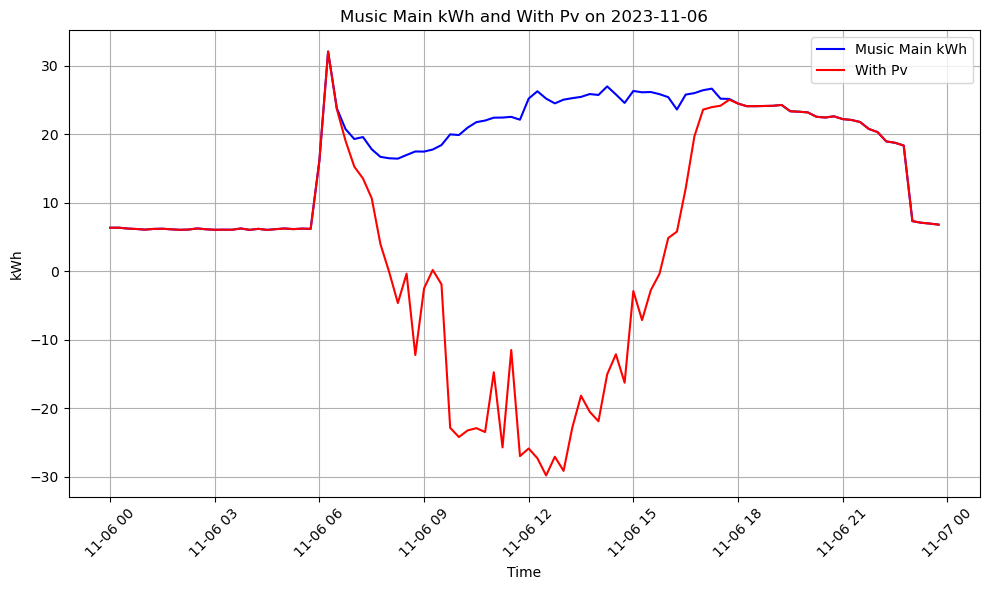

In [39]:


# Plot the data for 'music_main_kWh' and 'difference'
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['music_main_kWh'], label='Music Main kWh', color='b')
plt.plot(combined_data.index, combined_data['difference'], label='With Pv', color='r')

# Add title and labels
plt.title('Music Main kWh and With Pv on 2023-11-06')
plt.xlabel('Time')
plt.ylabel('kWh')

# Display legend
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
# Filter the data for 2023-11-06
webster_main_day = webster_hall_main.loc['2024-06-07']
parking_webster_day = parking_webster.loc['2024-06-07']

# Combine both datasets into one DataFrame
combined_data3 = pd.DataFrame({
    'webster_main_kWh': webster_main_day['kWh'],
    'parking_webster_kWh': parking_webster_day['power_avg_kwh']
})

combined_data3['difference'] = combined_data3['webster_main_kWh'] - combined_data3['parking_webster_kWh']
# Display the combined data
print(combined_data3)

                     webster_main_kWh  parking_webster_kWh  difference
datetime                                                              
2024-06-07 00:00:00            9.2825             0.000392    9.282108
2024-06-07 00:15:00            8.6625             0.000549    8.661951
2024-06-07 00:30:00            8.6475             0.000706    8.646794
2024-06-07 00:45:00            9.6225             0.000392    9.622108
2024-06-07 01:00:00            9.4950             0.000667    9.494333
...                               ...                  ...         ...
2024-06-07 22:45:00            9.7650             0.000510    9.764490
2024-06-07 23:00:00           10.0300             0.000353   10.029647
2024-06-07 23:15:00            9.6925             0.000471    9.692029
2024-06-07 23:30:00            8.8150             0.000549    8.814451
2024-06-07 23:45:00            9.1125             0.000589    9.111911

[96 rows x 3 columns]


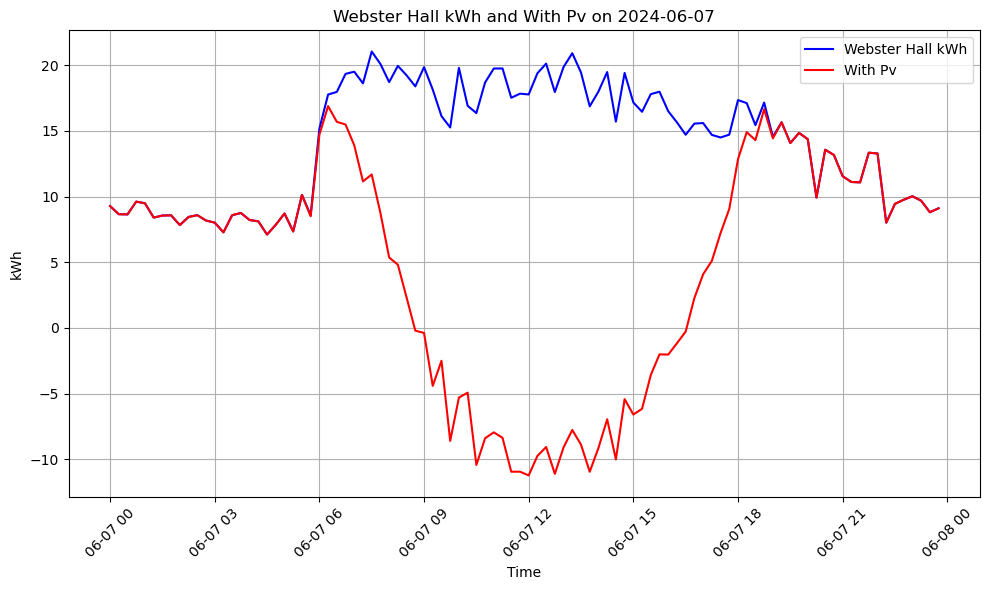

In [41]:


# Plot the data for 'music_main_kWh' and 'difference'
plt.figure(figsize=(10, 6))
plt.plot(combined_data3.index, combined_data3['webster_main_kWh'], label='Webster Hall kWh', color='b')
plt.plot(combined_data3.index, combined_data3['difference'], label='With Pv', color='r')

# Add title and labels
plt.title('Webster Hall kWh and With Pv on 2024-06-07')
plt.xlabel('Time')
plt.ylabel('kWh')

# Display legend
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
# Assuming your dataframe is named `merged_data_kWh_sum`
max_kWh_day2 = merged_webster_data_kWh_sum['kWh'].idxmax()  # Find the index of the max kWh value
max_kWh_value2 = merged_webster_data_kWh_sum['kWh'].max()   # Find the maximum kWh value

# Print the results
print(f"Day with maximum kWh: {max_kWh_day2} with {max_kWh_value2} kWh")

Day with maximum kWh: 2024-06-07 00:00:00 with 1364.1 kWh
